In [5]:
%matplotlib Widget

import probability_density_functions as pdfs

import importlib
import numpy as np
import matplotlib.pyplot as plt

[[-0.28543032  0.8127626  -0.50788433]
 [ 0.07804457 -0.99282619 -0.0905826 ]
 [-0.91328155 -0.14446342  0.38085054]
 [ 0.41921688 -0.82727682  0.37399233]
 [-0.03441868 -0.04099088 -0.99856652]
 [ 0.71804836  0.25885829 -0.6460642 ]
 [-0.40557882 -0.87244626  0.27265974]
 [ 0.53148136 -0.18458735 -0.82671342]
 [-0.75216979 -0.63815682  0.16430603]
 [ 0.5307055   0.84720636  0.02435273]
 [ 0.64270027  0.2779316   0.71392604]
 [-0.13414134 -0.1069411   0.98517496]
 [-0.78417345 -0.31685057  0.53355198]
 [ 0.6982773  -0.631325   -0.33739821]
 [-0.71015989 -0.66439635  0.23291719]
 [ 0.15785447 -0.6974688   0.69901305]
 [ 0.34183583 -0.89197753 -0.29584515]
 [-0.03991341  0.36714906  0.92930538]
 [-0.33628473 -0.03681264  0.9410406 ]
 [-0.82204229  0.23082026  0.52054633]
 [-0.53382331  0.84068103  0.09103889]
 [-0.97200358 -0.02375342 -0.23376229]
 [ 0.6681281  -0.58124243  0.46450198]
 [ 0.65435483  0.05985512 -0.75381505]
 [-0.62436459  0.17562109 -0.76113474]
 [-0.72795772 -0.67909767

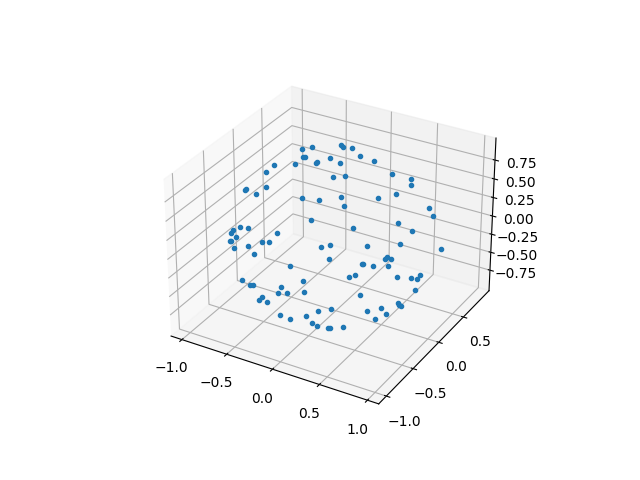

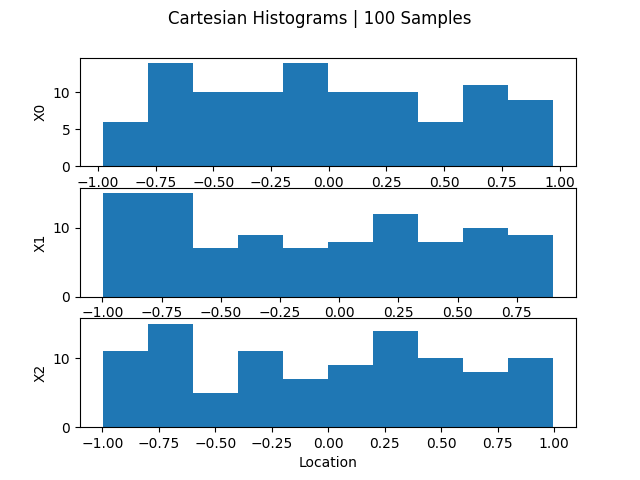

In [25]:
importlib.reload(pdfs)

hypersphere = pdfs.get_samples_gaussian(100, 3)
print(hypersphere)
ax = plt.figure().add_subplot(projection="3d")
ax.plot(*hypersphere.T, ".")
pdfs.plot_cartesian_histograms(hypersphere)

(100, 3)
(100, 3)
[ 0.07804457  0.98072266 -0.17914272]
[ 0.07804457 -0.99282619 -0.0905826 ]


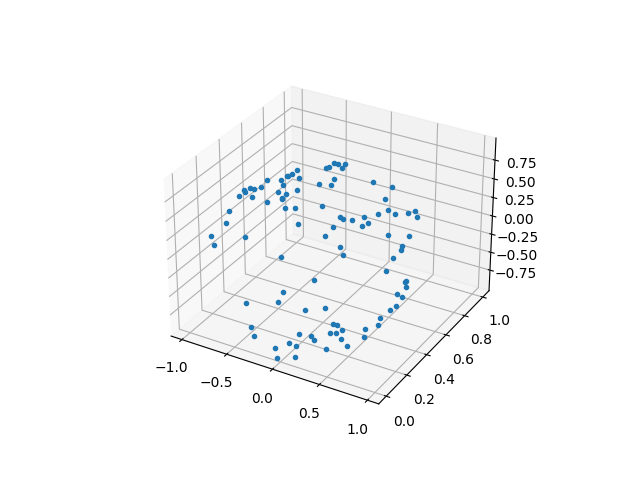

In [44]:
importlib.reload(pdfs)
spherical_coords = pdfs.cartesian_to_spherical(hypersphere)
print(spherical_coords.shape)
cartesian_coords = pdfs.spherical_to_cartesian(spherical_coords)
print(cartesian_coords.shape)
print(cartesian_coords[1])
print(hypersphere[1])
ax = plt.figure().add_subplot(projection="3d")
ax.plot(*cartesian_coords.T, ".")